<a href="https://colab.research.google.com/github/Jaypal24/Traffic-Sign-Detection-and-Classification-Project/blob/main/TRAFFIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()   # 📌 Upload kaggle.json here


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jaypal24","key":"226867faf794e932a896ffa55d06c910"}'}

In [2]:
!mv "kaggle (1).json" kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!ls ~/.kaggle


kaggle.json


In [6]:
!unzip -o /content/traffic-signs-preprocessed.zip -d /content/traffic-signs-preprocessed


Archive:  /content/traffic-signs-preprocessed.zip
  inflating: /content/traffic-signs-preprocessed/data0.pickle  
  inflating: /content/traffic-signs-preprocessed/data1.pickle  
  inflating: /content/traffic-signs-preprocessed/data2.pickle  
  inflating: /content/traffic-signs-preprocessed/data3.pickle  
  inflating: /content/traffic-signs-preprocessed/data4.pickle  
  inflating: /content/traffic-signs-preprocessed/data5.pickle  
  inflating: /content/traffic-signs-preprocessed/data6.pickle  
  inflating: /content/traffic-signs-preprocessed/data7.pickle  
  inflating: /content/traffic-signs-preprocessed/data8.pickle  
  inflating: /content/traffic-signs-preprocessed/datasets_preparing.py  
  inflating: /content/traffic-signs-preprocessed/label_names.csv  
  inflating: /content/traffic-signs-preprocessed/labels.pickle  
  inflating: /content/traffic-signs-preprocessed/mean_image_gray.pickle  
  inflating: /content/traffic-signs-preprocessed/mean_image_rgb.pickle  
  inflating: /content/

In [7]:
import os
print(os.listdir('/content/traffic-signs-preprocessed'))


['labels.pickle', 'data7.pickle', 'data1.pickle', 'data8.pickle', 'test.pickle', 'data6.pickle', 'data3.pickle', 'data5.pickle', 'data0.pickle', 'mean_image_gray.pickle', 'data2.pickle', 'std_rgb.pickle', 'label_names.csv', 'mean_image_rgb.pickle', 'data4.pickle', 'train.pickle', 'std_gray.pickle', 'datasets_preparing.py', 'valid.pickle']


In [8]:
import pickle

with open('/content/traffic-signs-preprocessed/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')


In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import os
import pickle

# Keras & TensorFlow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
with open('/content/traffic-signs-preprocessed/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')


In [14]:
## PREPROCESS
x_train = data['x_train'].transpose(0, 2, 3, 1)
x_val = data['x_validation'].transpose(0, 2, 3, 1)
x_test = data['x_test'].transpose(0, 2, 3, 1)

y_train = to_categorical(data['y_train'], 43)
y_val = to_categorical(data['y_validation'], 43)
y_test = to_categorical(data['y_test'], 43)


In [16]:
## CHECKING SHAPE
print(x_train.shape, y_train.shape)


(86989, 32, 32, 3) (86989, 43)


In [18]:
## MODEL bUILDING

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,165,291 (4.45 MB)

 Trainable params: 1,164,843 (4.44 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)


In [20]:
start = timer()

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=(x_val, y_val))

end = timer()
print("Training Time:", end - start)


Epoch 1/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 386s 280ms/step - accuracy: 0.4436 - loss: 2.0451 - val_accuracy: 0.8737 - val_loss: 0.4427
Epoch 2/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 382s 281ms/step - accuracy: 0.8929 - loss: 0.3476 - val_accuracy: 0.9116 - val_loss: 0.3445
Epoch 3/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 397s 292ms/step - accuracy: 0.9307 - loss: 0.2257 - val_accuracy: 0.9059 - val_loss: 0.4246
Epoch 4/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 390s 286ms/step - accuracy: 0.9439 - loss: 0.1839 - val_accuracy: 0.9204 - val_loss: 0.4288
Epoch 5/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 435s 281ms/step - accuracy: 0.9522 - loss: 0.1647 - val_accuracy: 0.9311 - val_loss: 0.3328
Epoch 6/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 386s 284ms/step - accuracy: 0.9607 - loss: 0.1327 - val_accuracy: 0.9345 - val_loss: 0.2609
Epoch 7/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 390s 286ms/step - accuracy: 0.9630 - loss: 0.1288 - val_accuracy: 0.9508 - val_loss: 0.2141
Epoch 8/15
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 444s 288ms/step - ac

In [21]:
# Evaluate model on unseen test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


395/395 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9491 - loss: 0.2927
✅ Test Accuracy: 94.88%
✅ Test Loss: 0.3077


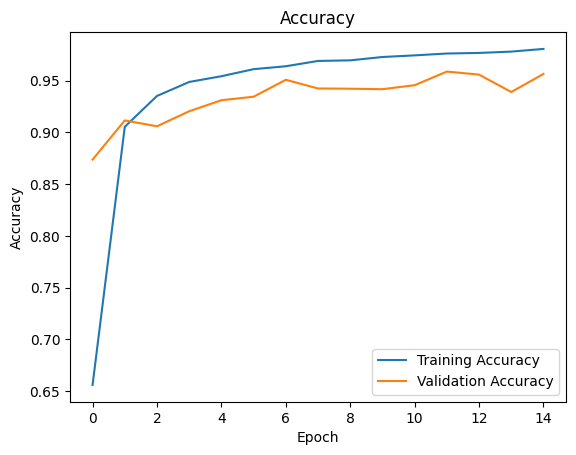

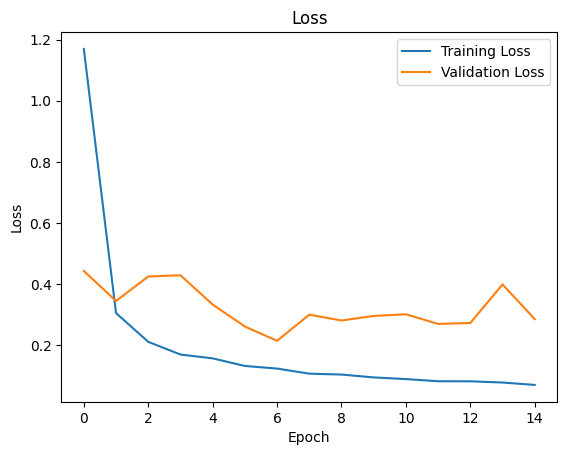

In [22]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
# Predict class probabilities for test images
y_pred = model.predict(x_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step


              precision    recall  f1-score   support

           0       0.88      0.87      0.87        60
           1       0.87      0.99      0.92       720
           2       0.99      0.91      0.95       750
           3       0.96      0.92      0.94       450
           4       0.97      0.96      0.96       660
           5       0.92      0.94      0.93       630
           6       0.92      0.85      0.89       150
           7       0.97      0.88      0.92       450
           8       0.90      0.99      0.94       450
           9       0.98      0.99      0.98       480
          10       1.00      0.98      0.99       660
          11       0.95      0.97      0.96       420
          12       0.99      0.94      0.96       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       0.98      0.99      0.98       210
          16       0.99      1.00      1.00       150
          17       1.00    

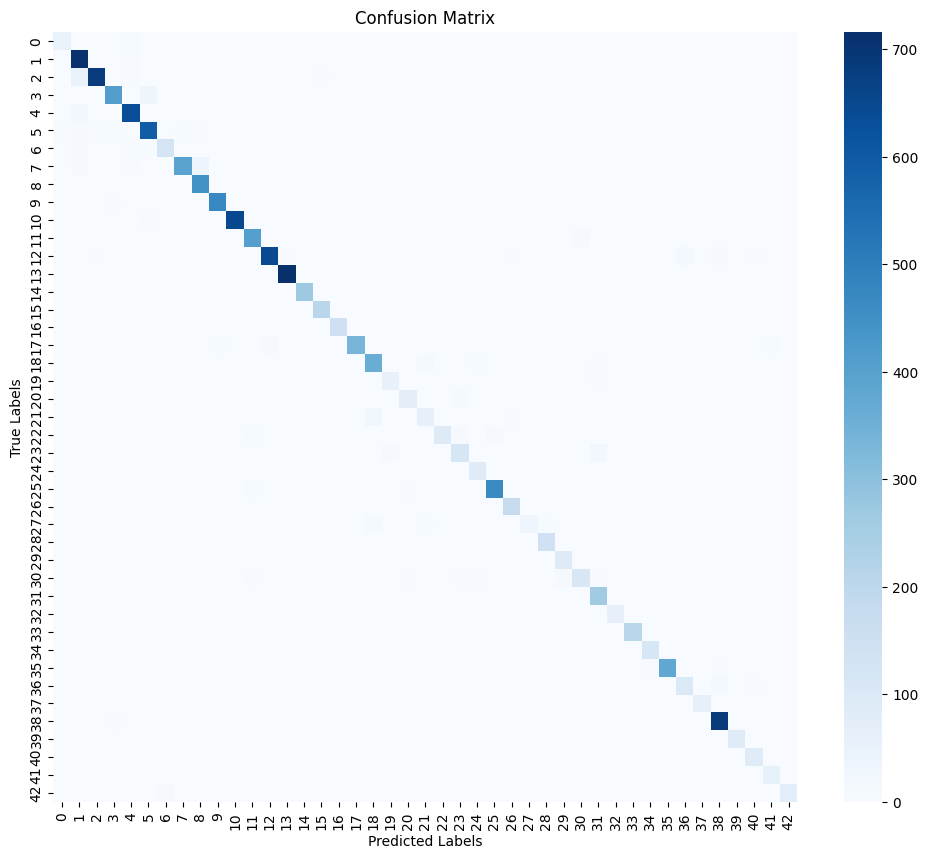

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification Report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [26]:
model.save('/content/cnn_model.h5')


In [47]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [48]:
model.save('/content/drive/MyDrive/traffic_sign_cnn_model.h5')


In [50]:
from google.colab import files
files.download('/content/drive/MyDrive/traffic_sign_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>